##  GS Data Science  - Análise da situação do Brasil e do mundo sobre a emissão de Co2



##### Bryan Willian Messias Barbosa - RM551305
##### Gabriel Fernandes Doms - RM98630
##### Lucas Vassão Braga - RM98607

###                               Introdução


A emissão de CO₂ é um dos principais fatores responsáveis pelas mudanças climáticas, com impactos significativos no aquecimento global. A queima de combustíveis fósseis, como petróleo, gás e carvão, é uma das maiores fontes de emissões, juntamente com processos industriais como a produção de cimento e a queima de gás flaring. O objetivo deste trabalho é analisar as emissões de CO₂ no Brasil, comparando-as com os EUA, China e a média global.



_______


Primeiramente, deve-se importar todas as bibliotecas a serem usadas no nosso projeto

In [80]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [81]:
# Carregar o dataset
df = pd.read_csv('emissao_Co2.csv')

print(df.head(1))

  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675


## Processo de limpeza do dataset

In [82]:
columns_to_keep = ['country_code', 'country_name', 'year', 'value']
df = df[columns_to_keep]

# Definir os países para manter
countries_to_keep = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Italy', 'Japan', 'South Korea', 'Australia',
    'Brazil', 'Argentina', 'Chile', 'Mexico', 'Colombia',
    'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'World'
]

# Filtrar o dataset
df_new = df[df['country_name'].isin(countries_to_keep)]

# Salvar o dataset filtrado
df_new.to_csv('filtered_dataset.csv', index=False)

# Exibir as primeiras linhas do dataset filtrado
print(df_new.head())

    country_code country_name  year      value
507          ARG    Argentina  1960  48815.104
508          ARG    Argentina  1961  51180.319
509          ARG    Argentina  1962  53695.881
510          ARG    Argentina  1963  50083.886
511          ARG    Argentina  1964  55727.399


In [83]:
# Carregar o dataset
df2 = pd.read_csv('dataset02.csv')

print(df2.head(1))

        Entity Code  Year  Annual CO₂ emissions from other industry  \
0  Afghanistan  AFG  1970                                       NaN   

   Annual CO₂ emissions from flaring  Annual CO₂ emissions from cement  \
0                           297436.0                           47350.0   

   Annual CO₂ emissions from gas  Annual CO₂ emissions from oil  \
0                       216651.0                       671986.0   

   Annual CO₂ emissions from coal  
0                        436974.0  


## Limpeza do segundo dataset

O objetivo é deixar só os países ou grupos para fazer a pesquisa, e excluir dados anterior ao ano de 1960 para melhor analise e melhor desempenho

In [84]:

entities_to_keep = [
    'World', 'South America',
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Italy', 'Japan', 'South Korea', 'Australia',
    'Brazil', 'Argentina', 'Chile', 'Mexico', 'Colombia',
    'Peru', 'Venezuela', 'Ecuador', 'Bolivia'
]


df_filtered = df2[df2['Entity'].isin(entities_to_keep)]


df_filtered = df_filtered[df_filtered['Year'] >= 1960]


print(f"Minimum year in the filtered dataset: {df_filtered['Year'].min()}")


min_year = df_filtered['Year'].min()
print(f"The smallest year in the dataset is: {min_year}")


print(df_filtered.head())


Minimum year in the filtered dataset: 1960
The smallest year in the dataset is: 1960
         Entity Code  Year  Annual CO₂ emissions from other industry  \
1477  Argentina  ARG  1966                                       NaN   
1478  Argentina  ARG  1967                                       NaN   
1479  Argentina  ARG  1968                                       NaN   
1480  Argentina  ARG  1969                                       NaN   
1481  Argentina  ARG  1970                                       NaN   

      Annual CO₂ emissions from flaring  Annual CO₂ emissions from cement  \
1477                          2344960.0                         1722651.0   
1478                          2795945.0                         1755556.0   
1479                          2876240.0                         2064273.1   
1480                          2832272.0                         2147862.0   
1481                          2810288.0                         2344113.0   

      Annual CO₂ em

### Agora vamos juntar os dois datasets para analises mais amplas


In [85]:
# Ajustar os nomes das colunas no df2 para que correspondam aos do df_new
df2.rename(columns={
    'Entity': 'country_name',  
    'Code': 'country_code',   
    'Year': 'year'            
}, inplace=True)

# Verificar e corrigir discrepâncias nos nomes dos países, se necessário
df2['country_name'] = df2['country_name'].replace({
    'Brasil': 'Brazil',  # Exemplo de ajuste; inclua outros conforme necessário
    'United States of America': 'United States'
})

# Realizar a junção com base em 'country_name', 'country_code' e 'year'
merged_df = pd.merge(
    df_new,
    df2,  # Incluir todas as colunas do df2
    on=['country_name', 'country_code', 'year'],
    how='left'  # Mantém todas as linhas do df_new, adicionando as colunas do df2
)

# Verificar o número total de colunas e os nomes delas após a junção
num_columns = merged_df.shape[1]
print(f"O dataset agora tem {num_columns} colunas.")

print("As colunas no dataset são:")
print(merged_df.columns)

# Salvar o dataset resultante
merged_df.to_csv('merged_dataset_complete.csv', index=False)

# Exibir algumas linhas do dataset final
print(merged_df.head())


O dataset agora tem 10 colunas.
As colunas no dataset são:
Index(['country_code', 'country_name', 'year', 'value',
       'Annual CO₂ emissions from other industry',
       'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from cement',
       'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from oil',
       'Annual CO₂ emissions from coal'],
      dtype='object')
  country_code country_name  year      value  \
0          ARG    Argentina  1960  48815.104   
1          ARG    Argentina  1961  51180.319   
2          ARG    Argentina  1962  53695.881   
3          ARG    Argentina  1963  50083.886   
4          ARG    Argentina  1964  55727.399   

   Annual CO₂ emissions from other industry  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Annual CO₂ emissions from flaring  Annual 

### Abaixo será feito um gráfico para comparar a quantidade de emissões de co2 na OECD e América do sul

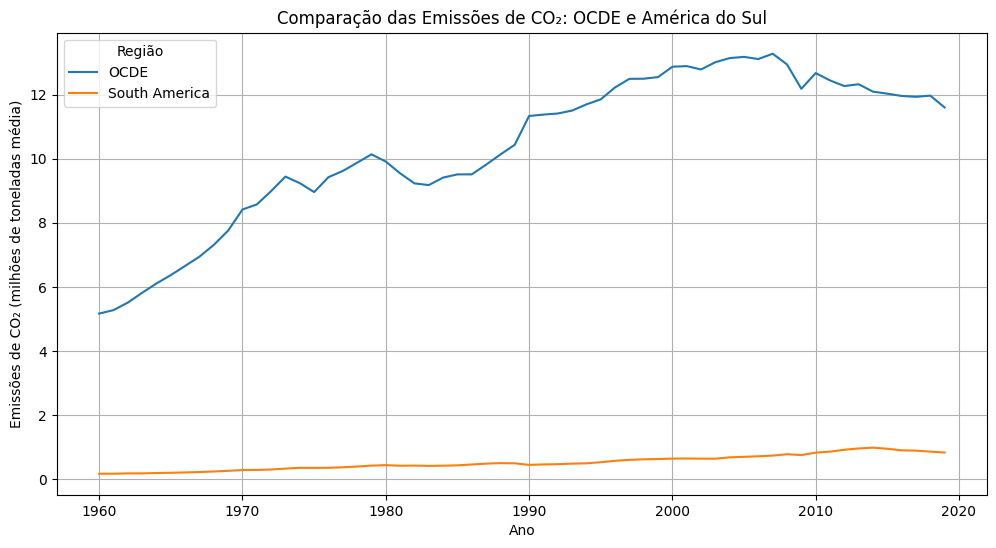

In [86]:

# Categorizar os países em regiões
oecd_countries = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA'
]
south_america_countries = [
    'ARG', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN'
]

# Criar uma nova coluna categorizando as regiões
df['region'] = df['country_code'].apply(
    lambda x: 'OCDE' if x in oecd_countries else 
              'South America' if x in south_america_countries else 'Other'
)

# Agrupar por ano e região para somar as emissões
df['value'] = df['value'] / 1_000_000  # Convertendo para milhões de toneladas
regional_emissions = df.groupby(['year', 'region'])['value'].sum().reset_index()

# Filtrar as regiões de interesse (removendo Brasil e EUA)
regions_of_interest = ['OCDE', 'South America']
filtered_regions = regional_emissions[regional_emissions['region'].isin(regions_of_interest)]

# Criar o gráfico
plt.figure(figsize=(12, 6))

for region in regions_of_interest:
    region_data = filtered_regions[filtered_regions['region'] == region]
    plt.plot(region_data['year'], region_data['value'], label=region)

# Personalizações do gráfico
plt.title('Comparação das Emissões de CO₂: OCDE e América do Sul')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (milhões de toneladas média)')
plt.legend(title='Região')
plt.grid(True)

# Exibir o gráfico
plt.show()


As emissões de CO₂ da OCDE são maiores do que as da América do Sul devido principalmente à diferença no nível de industrialização e consumo de energia. Os países da OCDE, como os EUA, Alemanha e Japão, são economias altamente industrializadas, com grande dependência de combustíveis fósseis, enquanto a América do Sul, embora em crescimento, tem uma matriz energética mais limpa, com maior uso de energia hidroelétrica, especialmente no Brasil. Além disso, as economias da OCDE têm uma demanda de energia muito maior, devido ao tamanho das populações e PIBs, o que resulta em emissões significativamente mais altas.

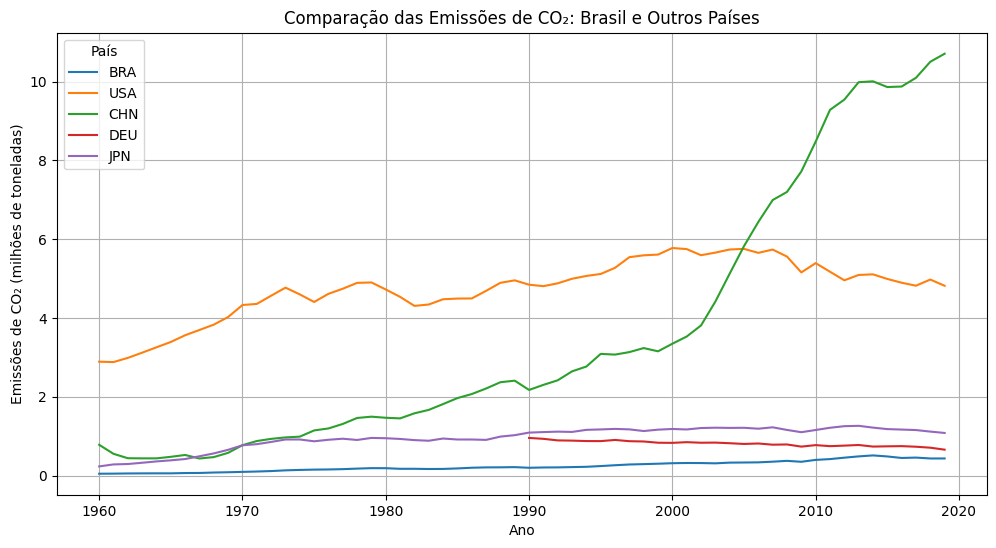

In [87]:

# Lista de países para comparar com o Brasil
countries_of_interest = ['BRA', 'USA', 'CHN', 'DEU', 'JPN']

# Filtrando os dados para incluir apenas os países de interesse
df_filtered_countries = df[df['country_code'].isin(countries_of_interest)]

# Agrupar por ano e país e somar as emissões
country_emissions = df_filtered_countries.groupby(['year', 'country_code'])['value'].sum().reset_index()

# Criar o gráfico
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    country_data = country_emissions[country_emissions['country_code'] == country]
    plt.plot(country_data['year'], country_data['value'], label=country)

# Personalizações do gráfico
plt.title('Comparação das Emissões de CO₂: Brasil e Outros Países')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (milhões de toneladas)')
plt.legend(title='País')
plt.grid(True)

# Exibir o gráfico
plt.show()


Ao comparar o Brasil com países como os EUA e China, podemos observar que, apesar de ser uma economia em desenvolvimento, o Brasil tem um impacto ambiental consideravelmente menor em termos de emissões de CO₂ devido à sua matriz energética com maior participação de fontes renováveis como hidrelétricas. Em contraste, países como os EUA e China, com grande industrialização e dependência de combustíveis fósseis, apresentam níveis de emissões mais elevados.

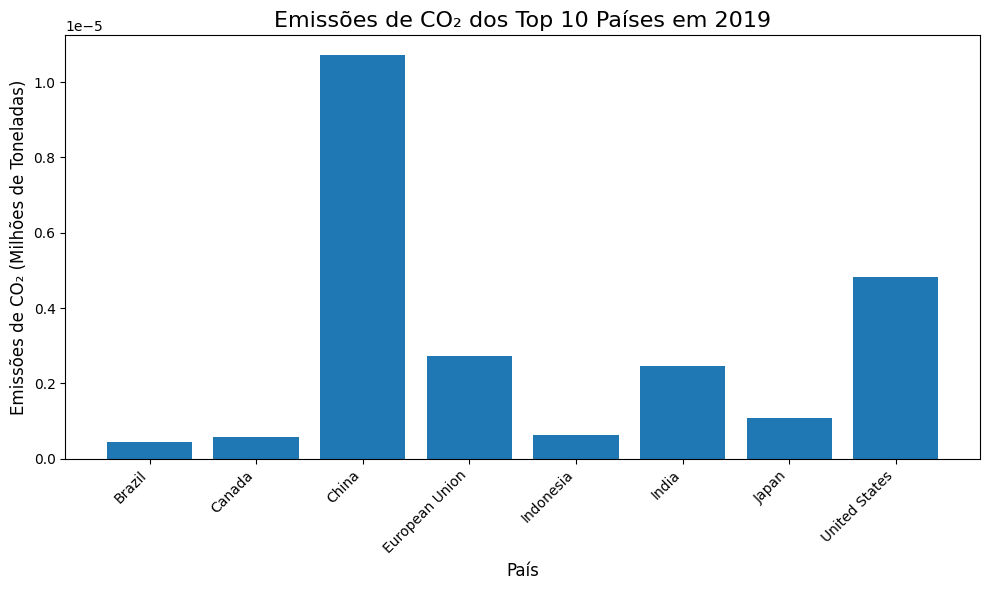

In [88]:

# Países com maiores emissões
top_countries = ['China', 'United States', 'India', 'European Union', 'Russia', 
                 'Japan', 'Brazil', 'Indonesia', 'Iran', 'Canada']

# Filtrar dados para esses países
df_top_countries = df[df['country_name'].isin(top_countries)]

# Filtrar para o ano mais recente (ou ano de interesse)
latest_year = df_top_countries['year'].max()
df_latest = df_top_countries[df_top_countries['year'] == latest_year]

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_latest['country_name'], df_latest['value'] / 1.0e6)  # Convertendo para milhões de toneladas

# Adicionar título e labels
plt.title(f'Emissões de CO₂ dos Top 10 Países em {latest_year}', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Emissões de CO₂ (Milhões de Toneladas)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir gráfico
plt.show()


A análise do gráfico revela que os Estados Unidos e a China estão liderando disparadamente as emissões de CO₂, com a China apresentando um crescimento contínuo e se destacando como o maior emissor de todos, enquanto os EUA ocupam a segunda posição. Em contraste, a União Europeia, que possui políticas ambientais mais rigorosas e tem investido em fontes de energia renováveis, apresenta números bem inferiores. A diferença nas emissões pode refletir não apenas o tamanho econômico e populacional, mas também a estratégia energética e os compromissos climáticos adotados por essas regiões, destacando o desafio de equilibrar desenvolvimento e sustentabilidade ambiental.

In [91]:
# Mostrar os nomes das colunas
print(merged_df.columns)


Index(['country_code', 'country_name', 'year', 'value',
       'Annual CO₂ emissions from other industry',
       'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from cement',
       'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from oil',
       'Annual CO₂ emissions from coal'],
      dtype='object')


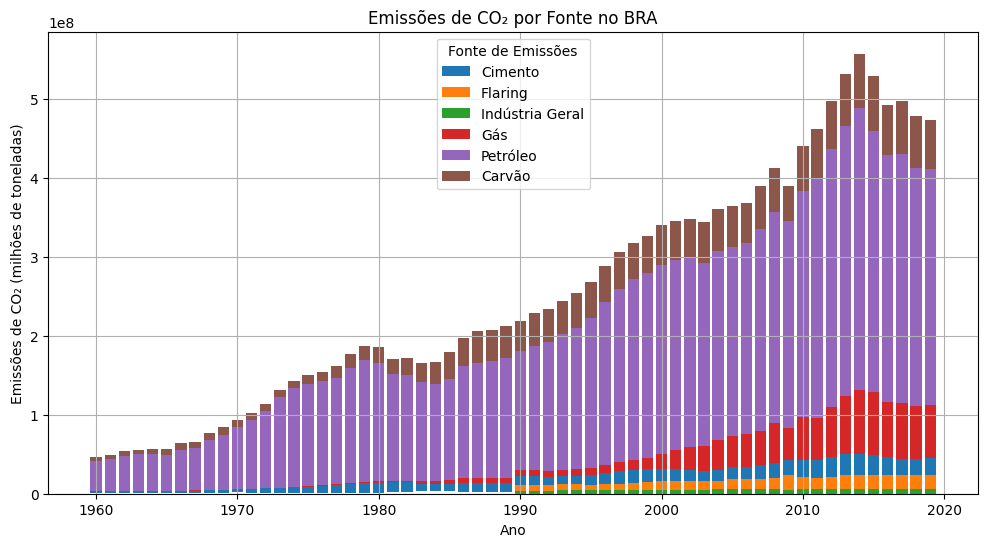

In [94]:


# Definir o país de interesse 
country = 'BRA'

# Filtrar os dados para o país e o ano desejado
country_data = merged_df[merged_df['country_code'] == country]

# Plotando as emissões por fonte para cada ano
plt.figure(figsize=(12, 6))

# Criando barras empilhadas para as diferentes fontes de emissão
plt.bar(country_data['year'], country_data['Annual CO₂ emissions from cement'], label='Cimento', 
        bottom=country_data[['Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry']].sum(axis=1))
plt.bar(country_data['year'], country_data['Annual CO₂ emissions from flaring'], label='Flaring', 
        bottom=country_data['Annual CO₂ emissions from other industry'])
plt.bar(country_data['year'], country_data['Annual CO₂ emissions from other industry'], label='Indústria Geral')

# Outras fontes de emissão
plt.bar(country_data['year'], country_data['Annual CO₂ emissions from gas'], label='Gás', 
        bottom=country_data[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry']].sum(axis=1))
plt.bar(country_data['year'], country_data['Annual CO₂ emissions from oil'], label='Petróleo', 
        bottom=country_data[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry', 'Annual CO₂ emissions from gas']].sum(axis=1))
plt.bar(country_data['year'], country_data['Annual CO₂ emissions from coal'], label='Carvão', 
        bottom=country_data[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry', 'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from oil']].sum(axis=1))

# Personalização do gráfico
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (milhões de toneladas)')
plt.title(f'Emissões de CO₂ por Fonte no {country}')
plt.legend(title="Fonte de Emissões")
plt.grid(True)

# Exibir o gráfico
plt.show()



O gráfico mostra que as emissões de CO2 no Brasil aumentaram muito ao longo dos anos, principalmente por causa do petróleo e do carvão. Isso é ruim para o meio ambiente e contribui para o aquecimento global.

Para melhorar a situação, o Brasil precisa usar menos combustíveis fósseis e investir em energias limpas, como a solar e a eólica.

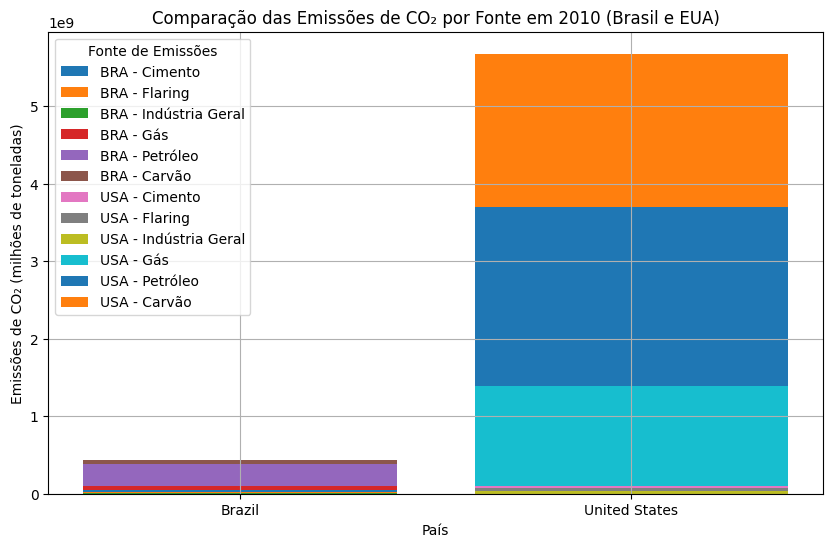

In [97]:

# Filtrar os dados para o ano de 2010 e para os países Brasil e Estados Unidos
countries = ['BRA', 'USA']  # Códigos dos países: Brasil e EUA
country_data_2010 = merged_df[(merged_df['country_code'].isin(countries)) & (merged_df['year'] == 2010)]

# Criar gráfico
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico para melhor visualização

# Para cada país, plotar as barras empilhadas das emissões por fonte
for country in countries:
    country_data = country_data_2010[country_data_2010['country_code'] == country]
    
    # Barras empilhadas para cada país
    plt.bar(country_data['country_name'], country_data['Annual CO₂ emissions from cement'], 
            label=f'{country} - Cimento', 
            bottom=country_data[['Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry']].sum(axis=1))
    plt.bar(country_data['country_name'], country_data['Annual CO₂ emissions from flaring'], 
            label=f'{country} - Flaring', 
            bottom=country_data['Annual CO₂ emissions from other industry'])
    plt.bar(country_data['country_name'], country_data['Annual CO₂ emissions from other industry'], 
            label=f'{country} - Indústria Geral')

    # Outras fontes de emissão
    plt.bar(country_data['country_name'], country_data['Annual CO₂ emissions from gas'], 
            label=f'{country} - Gás', 
            bottom=country_data[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry']].sum(axis=1))
    plt.bar(country_data['country_name'], country_data['Annual CO₂ emissions from oil'], 
            label=f'{country} - Petróleo', 
            bottom=country_data[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry', 'Annual CO₂ emissions from gas']].sum(axis=1))
    plt.bar(country_data['country_name'], country_data['Annual CO₂ emissions from coal'], 
            label=f'{country} - Carvão', 
            bottom=country_data[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from other industry', 'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from oil']].sum(axis=1))

# Personalização do gráfico
plt.xlabel('País')
plt.ylabel('Emissões de CO₂ (milhões de toneladas)')
plt.title('Comparação das Emissões de CO₂ por Fonte em 2010 (Brasil e EUA)')
plt.legend(title="Fonte de Emissões")
plt.grid(True)

# Exibir o gráfico
plt.show()


A análise das emissões de CO₂ em 2010 para o Brasil e os Estados Unidos revela que, enquanto ambos os países apresentam emissões significativas, as fontes de emissão dos EUA são muito mais expressivas em comparação com o Brasil. O gráfico mostra que os Estados Unidos têm contribuições substanciais de emissões provenientes de flaring, cimento e gás, com números muito maiores do que os do Brasil. O flaring, que se refere à queima de gás natural durante a extração de petróleo, representa uma grande fatia das emissões nos EUA, enquanto o Brasil não contribui significativamente para essa categoria. Além disso, as emissões de CO₂ provenientes do setor de cimento e gás nos EUA são expressivas, com valores muito superiores aos do Brasil.

Isso pode ser explicado pela diferença no nível de industrialização e na matriz energética dos dois países. 

### Conclusão

Ao comparar o Brasil com países como os EUA, notamos que enquanto o Brasil tem uma contribuição significativa nas emissões de CO₂, a distribuição dessas emissões é diferente, com destaque para setores como a indústria geral e o carvão. Em contraste, os Estados Unidos apresentam um grande impacto em setores como flaring (queima de gás natural), cimento e gás, com emissões muito mais expressivas. O Brasil, por sua vez, não tem um impacto significativo nas emissões provenientes desses setores.

A análise também revelou como a matriz energética e o grau de industrialização dos países influenciam diretamente suas emissões. Enquanto os EUA e China são dependentes de energias fósseis, como carvão, gás e petróleo, o Brasil, apesar de também usar fontes fósseis, tem uma maior dependência de energias renováveis, o que resulta em uma menor contribuição por parte de setores como flaring e cimento.

O aumento global das emissões de CO₂ é um reflexo do crescimento industrial e da demanda por energia, o que intensifica a necessidade de políticas de mitigação e transição energética, especialmente nos países com maior contribuição para as emissões, como os Estados Unidos e China. A análise do Brasil no contexto global destaca a importância de investir em fontes de energia mais limpas e em práticas industriais sustentáveis, para reduzir suas emissões e se alinhar aos objetivos globais de combate às mudanças climáticas.

Esses insights mostram a complexidade da questão das emissões de CO₂ e como fatores econômicos, energéticos e industriais moldam o perfil de emissão de cada país, evidenciando a necessidade de uma abordagem diferenciada para cada nação na busca por soluções mais sustentáveis.